# Model Comparison

Here we have the following models:
- 1 Conv layer with `Categorical Cross Entropy` loss function with `One Hot Encoding` of target
- 1 Conv layer with `Sparse Categorical Cross Entropy` loss function with `Sparse Encoding` of target

## Notebook Setup

In [1]:
import json
import logging
import mnist_data_load
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import tensorflow as tf
from tensorflow.keras.models import load_model

In [3]:
enable_logging = True
if enable_logging:
    logging.getLogger().setLevel(logging.INFO)

In [4]:
random_seed = 100
np.random.seed(random_seed)
tf.random.set_seed(random_seed)

In [5]:
assert len(tf.config.experimental.list_physical_devices('GPU')) == 1

## Loading Models

In [6]:
model_one_hot = load_model('cnn_1_08.h5')

In [7]:
model_sparse = load_model('cnn_1x8_sparse.h5')

In [8]:
model_one_hot_interm = load_model('cnn_1x8_onehot_interm.h5')

In [9]:
model_sparse_interm = load_model('cnn_1x8_sparse_interm.h5')

## Load Model training history

In [10]:
with open('cnn_1x8_onehot_training.json', 'r') as f:
    model_one_hot_training = json.loads(f.read())

In [11]:
with open('cnn_1x8_sparse_training.json', 'r') as f:
    model_sparse_training = json.loads(f.read())

## Comparing Models

### Model Training History

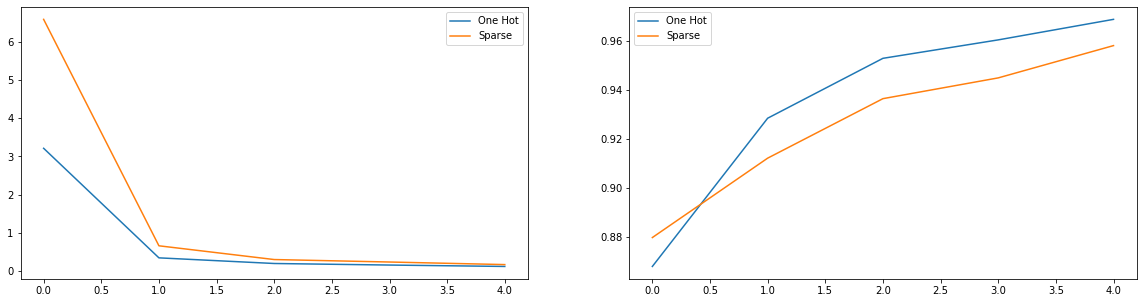

In [12]:
plt.figure(figsize=(20,5))
loss_plt = plt.subplot(1, 2, 1)
loss_plt.plot(model_one_hot_training['loss'], label='One Hot')
loss_plt.plot(model_sparse_training['loss'], label='Sparse')
loss_plt.legend(loc='best')
accuracy_plt = plt.subplot(1, 2, 2)
accuracy_plt.plot(model_one_hot_training['accuracy'], label='One Hot')
accuracy_plt.plot(model_sparse_training['sparse_categorical_accuracy'], label='Sparse')
accuracy_plt.legend(loc='best')
plt.show()

In [13]:
train_data, validation_data, test_data = mnist_data_load.load_data(seed=random_seed)

INFO:root:handling label: 1
INFO:root:handling label: 0
INFO:root:handling label: 4
INFO:root:handling label: 7
INFO:root:handling label: 3
INFO:root:handling label: 5
INFO:root:handling label: 8
INFO:root:handling label: 9
INFO:root:handling label: 2
INFO:root:handling label: 6


In [15]:
x_test, y_test = mnist_data_load.get_label_and_features_from_dataframe(test_data)

In [47]:
def show_interm_summary(models):
    rand_index = np.random.randint(0, x_test.shape[0])
    rand_feat = x_test[rand_index]
    predictions = []
    # make predictions
    for m in models:
        predictions.append(m[0].predict(rand_feat.reshape((1, 28, 28, 1))))
    # show summary
    num_models = len(models)
    plt.imshow(rand_feat.reshape((28,28)), cmap='gray')
    plt.show()
    # show each model's params
    for index, p in enumerate(predictions):
        fig = plt.figure(figsize=(16, 3), constrained_layout = True)
        plt.title(models[index][1])
        grid = gridspec.GridSpec(1, 2, figure=fig)
        grid0 = grid[0].subgridspec(2, 4)
        conv_layer = models[index][0].get_layer('conv2d')
        filters = conv_layer.get_weights()
        # show weights
        for i in range(8):
            row = i // 4
            col = i % 4
            subplt = fig.add_subplot(grid0[row, col])
            subplt.imshow(filters[0][:, :, :, i].reshape((3,3)), cmap='gray')
        # show filter outputs
        grid1 = grid[1].subgridspec(2, 4)
        for i in range(8):
            row = i // 4
            col = i % 4
            subplt = fig.add_subplot(grid1[row, col])
            subplt.imshow(p[0, :, :, i], cmap='gray')
        plt.show()

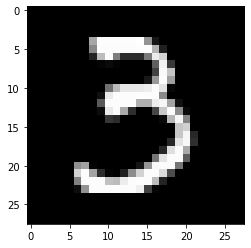

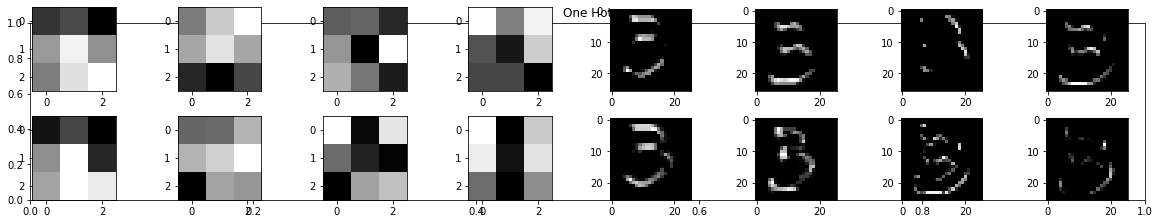

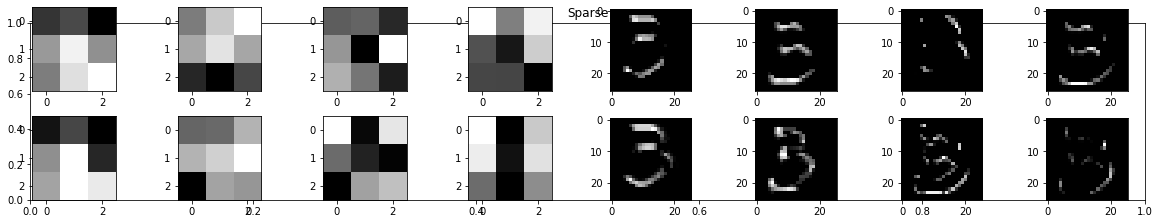

In [48]:
model_list= [(model_one_hot_interm, 'One Hot'), (model_one_hot_interm, 'Sparse')]
show_interm_summary(model_list)

## Observation

### One Hot vs Sparse

We can see that the accuracy differs by a small margin but both the models learned the same filters in 5 epochs and both have achieved the same loss by the end of 5th epoch

From this we can conclude that interchanging the loss function between `categorical_crossentropy` and `sparse_categorical_crossentropy` will not lead to mch difference except for the accuracy on the training set.